In [1]:
import pickle
from importlib import reload
import numpy as np
from scipy import sparse
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import features
reload(features)
from features import load_features

In [3]:
import submission
reload(submission)
from submission import create_submission

In [4]:
import lightgbm as lgb

In [5]:
with ZipFile('../data/train.csv.zip') as z:
    with z.open('train.csv') as f:
        train_df = pd.read_csv(f)
y = train_df['deal_probability'].copy()
del train_df

In [6]:
def tokenizer(): pass

In [7]:
with open('../feature_exploration/text_features/title_tfidf_7000_pymorphy_vectorizer.pkl', 'rb') as f:
    title_tfv = pickle.load(f)

In [8]:
with open('../feature_exploration/text_features/description_tfidf_50000_pymorphy_vectorizer.pkl', 'rb') as f:
    description_tfv = pickle.load(f)

In [9]:
title_names = title_tfv.get_feature_names()

In [10]:
title_names[:10]

['1024mb',
 '104см',
 '10л',
 '1100d',
 '110см',
 '128gb',
 '12v',
 '12мес',
 '13кг',
 '14apr']

In [11]:
description_names = description_tfv.get_feature_names()

In [12]:
description_names[:10]

['000км',
 '000р',
 '000рубль',
 '000т',
 '00ghz',
 '00р',
 '00ч',
 '0gb',
 '0ghz',
 '0mp']

In [13]:
del title_tfv, description_tfv

# Baseline

In [13]:
feature_names = ['category_name', 'city', 'image_top_1', 'param_1', 'param_2', 'param_3',
                 'parent_category_name', 'region', 'user_type', 'image_is_null', 'item_seq_number',
                 'price', 'title_tfidf', 'description_tfidf']

In [14]:
_, train_features, categorical_indices = load_features('train', feature_names)

In [15]:
train_features = sparse.hstack(train_features)

In [19]:
params = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'verbose': 10,
    #'device': 'gpu',
    #'gpu_platform_id': 1,
    #'gpu_device_id': 0,
    'n_jobs': 4,
    'n_estimators': 200,
    'metric': 'l2',
}

In [20]:
lgb_reg = lgb.LGBMRegressor(**params)

In [21]:
lgb_reg.fit(train_features, y, categorical_feature=categorical_indices, feature_name=feature_names[:-2] + title_names + description_names, verbose=10)

C:\Data\Soft\Anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=-1, metric='l2', min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=200,
       n_jobs=4, num_leaves=31, objective='regression', random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1, verbose=10)

In [22]:
lgb_reg.feature_importances_

array([ 132, 1059, 1646, ...,    0,    0,    0])

In [23]:
np.where(lgb_reg.feature_importances_ > 10)

(array([   0,    1,    2,    3,    4,    5,    7,    8,    9,   10,   11,
         117,  141,  340,  623,  665, 1262, 1368, 2127, 2325, 3124, 3371,
        3380, 3407, 3657, 3665, 3690], dtype=int64),)

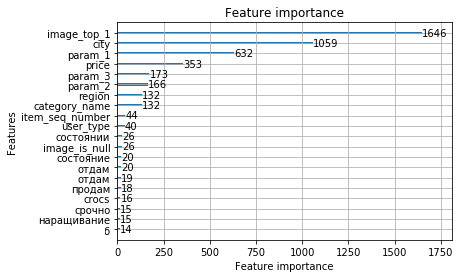

In [24]:
lgb.plot_importance(lgb_reg, max_num_features=20)

In [25]:
_, test_features, _ = load_features('test', feature_names)

In [26]:
test_features = sparse.hstack(test_features)

In [27]:
with ZipFile('../data/test.csv.zip') as z:
    with z.open('test.csv') as f:
        test_df = pd.read_csv(f)

In [28]:
create_submission(lgb_reg.predict(test_features), '../submissions/', 'lgbm_with_text_100', test_df)

C:\Data\Soft\Anaconda3\lib\site-packages\lightgbm\basic.py:447: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


### Baseline with text pymorphy2

In [34]:
feature_names = ['category_name', 'city', 'image_top_1', 'param_1', 'param_2', 'param_3',
                 'parent_category_name', 'region', 'user_type', 'image_is_null', 'item_seq_number',
                 'price', 'title_pymorphy_tfidf', 'description_pymorphy_tfidf']

In [35]:
_, train_features, categorical_indices = load_features('train', feature_names)

In [36]:
train_features = sparse.hstack(train_features)

In [37]:
params = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'verbose': 10,
    #'device': 'gpu',
    #'gpu_platform_id': 1,
    #'gpu_device_id': 0,
    'n_jobs': 4,
    'n_estimators': 200,
    'metric': 'l2',
}

In [38]:
lgb_reg = lgb.LGBMRegressor(**params)

In [39]:
lgb_reg.fit(train_features, y, categorical_feature=categorical_indices, feature_name=feature_names[:-2] + title_names + description_names, verbose=10)

C:\Data\Soft\Anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=-1, metric='l2', min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=200,
       n_jobs=4, num_leaves=31, objective='regression', random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1, verbose=10)

In [40]:
lgb_reg.feature_importances_

array([ 125, 1016, 1665, ...,    0,    0,    0])

In [41]:
np.where(lgb_reg.feature_importances_ > 10)

(array([   0,    1,    2,    3,    4,    5,    7,    8,    9,   10,   11,
         115,  138,  326,  427,  633,  681, 1240, 1338, 1360, 1798, 2127,
        2697, 3109, 3371, 3533, 3656, 3693], dtype=int64),)

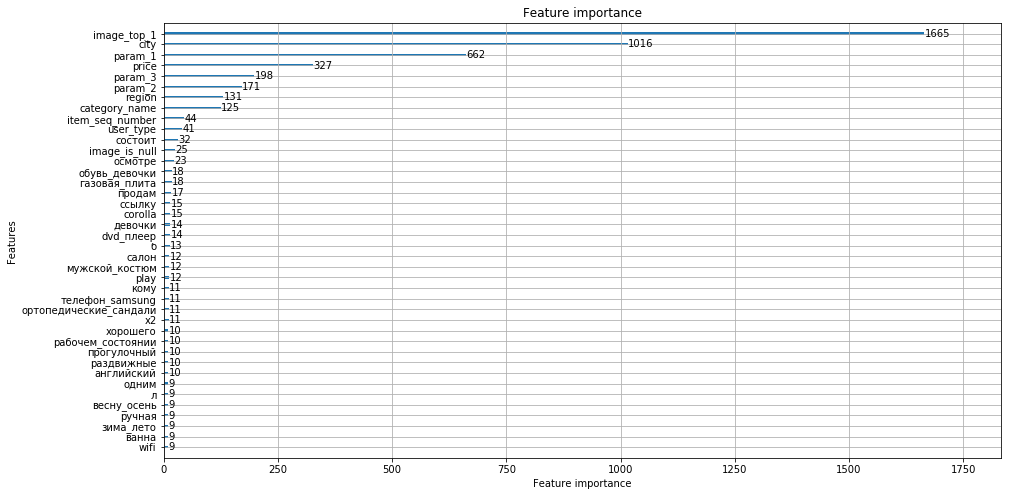

In [49]:
lgb.plot_importance(lgb_reg, max_num_features=40, figsize=(15, 8))

In [43]:
_, test_features, _ = load_features('test', feature_names)

In [44]:
test_features = sparse.hstack(test_features)

In [45]:
with ZipFile('../data/test.csv.zip') as z:
    with z.open('test.csv') as f:
        test_df = pd.read_csv(f)

In [46]:
create_submission(lgb_reg.predict(test_features), '../submissions/', 'lgbm_with_pymorphy_text_200', test_df)

C:\Data\Soft\Anaconda3\lib\site-packages\lightgbm\basic.py:447: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


Pymorphy didn't gove much improvement. Probably should check once more later.

## With title and descr. lengths

In [47]:
feature_names = ['category_name', 'city', 'image_top_1', 'param_1', 'param_2', 'param_3',
                 'parent_category_name', 'region', 'user_type', 'image_is_null', 'user_id', 'item_seq_number',
                 'price', 'title_length_chars', 'description_length_chars', 'title_tfidf', 'description_tfidf']

In [48]:
_, train_features, categorical_indices = load_features('train', feature_names)

In [49]:
train_features = sparse.hstack(train_features)

In [50]:
params = {
    'objective': 'regression_l2',
    'boosting_type': 'gbdt',
    'verbose': 10,
    #'device': 'gpu',
    #'gpu_platform_id': 1,
    #'gpu_device_id': 0,
    'n_jobs': 4,
    'n_estimators': 400,
    'metric': 'l2',
}

In [51]:
lgb_reg = lgb.LGBMRegressor(**params)

In [52]:
lgb_reg.fit(train_features, y, categorical_feature=categorical_indices, feature_name=feature_names[:-2] + title_names + description_names, verbose=10)

C:\Data\Soft\Anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=-1, metric='l2', min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=400,
       n_jobs=4, num_leaves=31, objective='regression_l2',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=1,
       verbose=10)

In [53]:
lgb_reg.feature_importances_

array([ 239, 2002, 2642, ...,    3,    0,    0])

In [54]:
np.where(lgb_reg.feature_importances_ > 10)

(array([   0,    1,    2,    3,    4,    5,    7,    8,    9,   10,   11,
          12,   13,   14,  120,  144,  212,  343,  352,  444,  626,  668,
         745,  941, 1265, 1371, 1394, 1397, 1602, 1641, 1865, 2130, 2328,
        2371, 2580, 2693, 2698, 2876, 3013, 3106, 3127, 3162, 3374, 3383,
        3410, 3541, 3660, 3668, 3693], dtype=int64),)

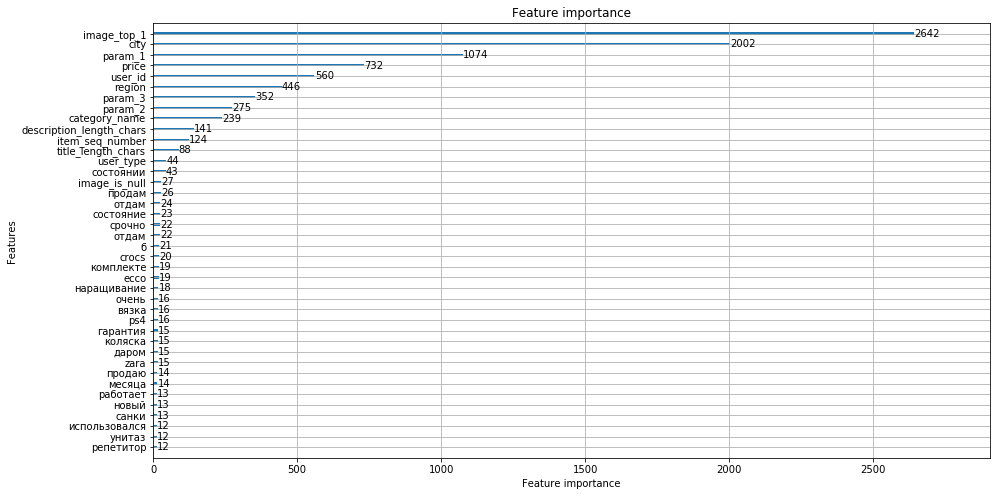

In [55]:
lgb.plot_importance(lgb_reg, max_num_features=40, figsize=(15, 8))

In [56]:
_, test_features, _ = load_features('test', feature_names)

In [57]:
test_features = sparse.hstack(test_features)

In [58]:
with ZipFile('../data/test.csv.zip') as z:
    with z.open('test.csv') as f:
        test_df = pd.read_csv(f)

In [59]:
create_submission(lgb_reg.predict(test_features), '../submissions/', 'lgbm_text_lengths', test_df)

C:\Data\Soft\Anaconda3\lib\site-packages\lightgbm\basic.py:447: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


## Tuned + huge text vectors

In [45]:
feature_names = ['category_name', 'city', 'image_top_1', 'param_1', 'param_2', 'param_3',
                 'parent_category_name', 'region', 'user_type', 'image_is_null', 'user_id', 'item_seq_number',
                 'price', 'title_length_chars', 'description_length_chars',
                 'title_tfidf_7000', 'description_tfidf_50000']

In [46]:
_, train_features, categorical_indices = load_features('train', feature_names)

In [47]:
train_features = sparse.hstack(train_features)

In [48]:
params = {
    'objective': 'regression_l2',
    'boosting_type': 'gbdt',
    'bagging_fraction': 0.8,
    'feature_fraction': 0.8,
    'n_estimators': 800,
    'learning_rate': 0.1,
    'num_leaves': 61,
}

In [49]:
lgb_reg = lgb.LGBMRegressor(**params)

In [50]:
%time lgb_reg.fit(train_features, y, categorical_feature=categorical_indices, feature_name=feature_names[:-2] + title_names + description_names, verbose=10)

C:\Data\Soft\Anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Wall time: 17min 40s


LGBMRegressor(bagging_fraction=0.8, boosting_type='gbdt', class_weight=None,
       colsample_bytree=1.0, feature_fraction=0.8, learning_rate=0.1,
       max_depth=-1, min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=800, n_jobs=-1, num_leaves=61,
       objective='regression_l2', random_state=None, reg_alpha=0.0,
       reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1)

In [51]:
lgb_reg.feature_importances_

array([ 739, 8285, 9295, ...,    0,    0,    0])

In [53]:
#np.where(lgb_reg.feature_importances_ > 10)

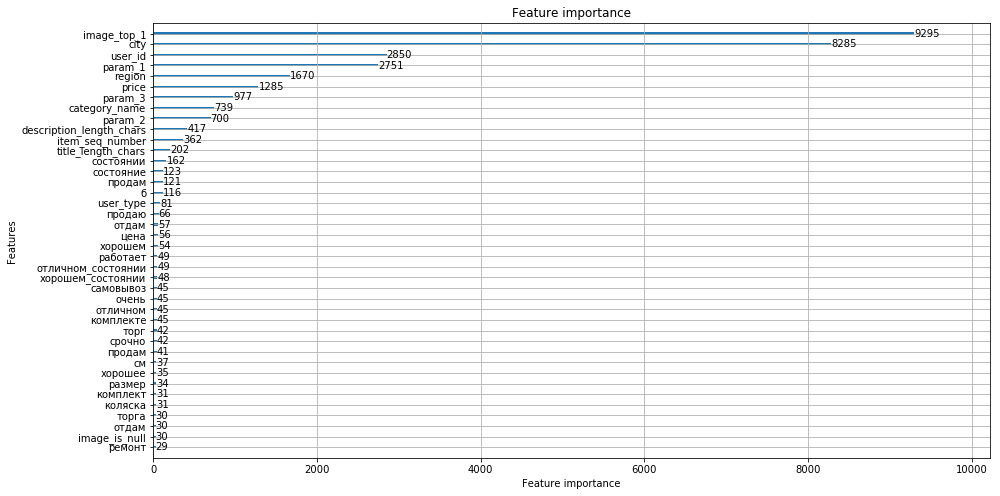

In [56]:
lgb.plot_importance(lgb_reg, max_num_features=40, figsize=(15, 8))

In [57]:
_, test_features, _ = load_features('test', feature_names)

In [58]:
test_features = sparse.hstack(test_features)

In [59]:
with ZipFile('../data/test.csv.zip') as z:
    with z.open('test.csv') as f:
        test_df = pd.read_csv(f)

In [60]:
create_submission(lgb_reg.predict(test_features), '../submissions/', 'lgbm_with_large_tfidf', test_df)

C:\Data\Soft\Anaconda3\lib\site-packages\lightgbm\basic.py:447: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


## Everything + VGG16_512

In [8]:
feature_names = ['category_name', 'city', 'image_top_1', 'param_1', 'param_2', 'param_3',
                 'parent_category_name', 'region', 'user_type', 'image_is_null', 'user_id', 'item_seq_number',
                 'price', 'title_length_chars', 'description_length_chars', 'vgg16_512',
                 'title_tfidf_7000', 'description_tfidf_50000']

In [24]:
_, train_features, categorical_indices = load_features('train', feature_names)

In [25]:
train_features = sparse.hstack(train_features)

In [28]:
params = {
    'objective': 'regression_l2',
    'boosting_type': 'gbdt',
    'bagging_fraction': 0.8,
    'feature_fraction': 0.8,
    'n_estimators': 800,
    'learning_rate': 0.1,
    'num_leaves': 61,
}

In [29]:
lgb_reg = lgb.LGBMRegressor(**params)

In [30]:
%time lgb_reg.fit(train_features, y, categorical_feature=categorical_indices, feature_name=feature_names[:-3] + ['vgg16'] * 512 + title_names + description_names, verbose=10)

C:\Data\Soft\Anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Wall time: 29min 33s


LGBMRegressor(bagging_fraction=0.8, boosting_type='gbdt', class_weight=None,
       colsample_bytree=1.0, feature_fraction=0.8, learning_rate=0.1,
       max_depth=-1, min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=800, n_jobs=-1, num_leaves=61,
       objective='regression_l2', random_state=None, reg_alpha=0.0,
       reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1)

In [31]:
lgb_reg.feature_importances_

array([  406,  6219, 10255, ...,     0,     0,     0])

In [53]:
#np.where(lgb_reg.feature_importances_ > 10)

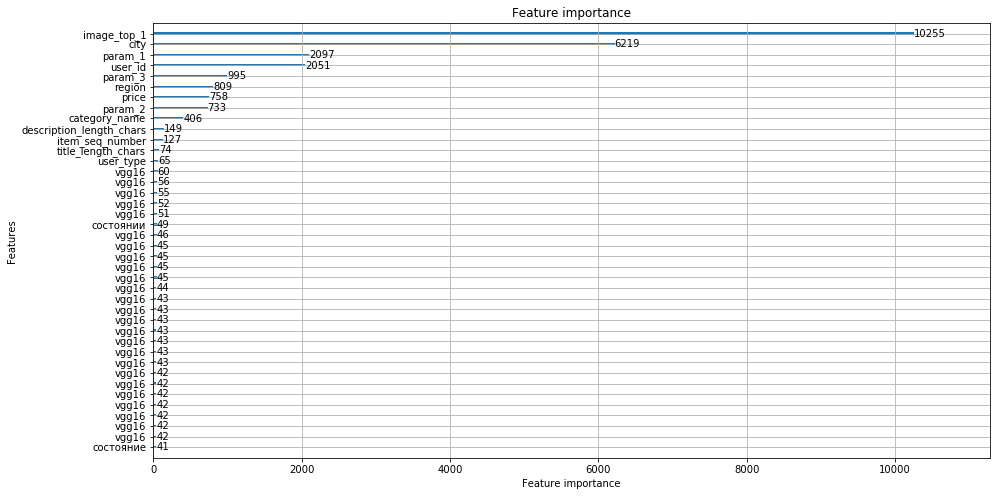

In [6]:
lgb.plot_importance(lgb_reg, max_num_features=40, figsize=(15, 8))

In [35]:
import pickle

In [36]:
with open('model_with_vgg16.pkl', 'wb') as f:
    pickle.dump(lgb_reg, f)

In [5]:
with open('model_with_vgg16.pkl', 'rb') as f:
    lgb_reg = pickle.load(f)

In [9]:
_, test_features, _ = load_features('test', feature_names)

In [10]:
test_features = sparse.hstack(test_features)

In [11]:
with ZipFile('../data/test.csv.zip') as z:
    with z.open('test.csv') as f:
        test_df = pd.read_csv(f)

In [12]:
create_submission(lgb_reg.predict(test_features), '../submissions/', 'lgbm_with_large_tfidf_and_vgg16', test_df)

C:\Data\Soft\Anaconda3\lib\site-packages\lightgbm\basic.py:447: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


## Everything + pymorphy + large model + mean encoding

In [14]:
feature_names = ['category_name', 'city', 'image_top_1', 'param_1', 'param_2', 'param_3',
                 'parent_category_name', 'region', 'user_type', 'image_is_null', 'user_id', 'item_seq_number',
                 'price', 'title_length_chars', 'description_length_chars', 'mean_encoded_categorical',
                 'title_tfidf_7000_pymorphy', 'description_tfidf_50000_pymorphy']

In [15]:
_, train_features, categorical_indices = load_features('train', feature_names)

In [26]:
train_features = sparse.hstack(train_features)

In [27]:
params = {
    'objective': 'regression_l2',
    'boosting_type': 'gbdt',
    'n_estimators': 1934,
    'learning_rate': 0.02,
    'num_leaves': 250,
    'feature_fraction': 0.65,
    'bagging_fraction': 0.85,
    'verbose': 10,
    'n_jobs': -1,
}

In [31]:
lgb_reg = lgb.LGBMRegressor(**params)

In [32]:
%time lgb_reg.fit(train_features, y, categorical_feature=categorical_indices, feature_name=feature_names[:-3] + ['mean_encoded'] * 18 + title_names + description_names)

C:\Data\Soft\Anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Wall time: 3h 26s


LGBMRegressor(bagging_fraction=0.85, boosting_type='gbdt', class_weight=None,
       colsample_bytree=1.0, feature_fraction=0.65, learning_rate=0.02,
       max_depth=-1, min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=1934, n_jobs=-1, num_leaves=250,
       objective='regression_l2', random_state=None, reg_alpha=0.0,
       reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1, verbose=10)

In [33]:
lgb_reg.feature_importances_

array([ 5865, 54129, 57431, ...,     0,     0,     0])

In [34]:
#np.where(lgb_reg.feature_importances_ > 10)

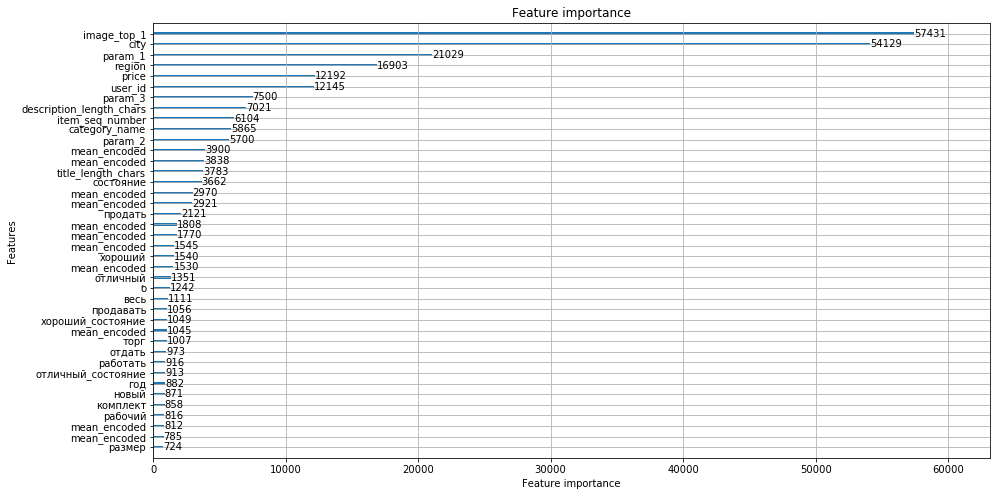

In [35]:
lgb.plot_importance(lgb_reg, max_num_features=40, figsize=(15, 8))

In [36]:
_, test_features, _ = load_features('test', feature_names)

In [37]:
test_features = sparse.hstack(test_features)

In [38]:
with ZipFile('../data/test.csv.zip') as z:
    with z.open('test.csv') as f:
        test_df = pd.read_csv(f)

In [39]:
create_submission(lgb_reg.predict(test_features), '../submissions/', 'lgbm_with_large_tfidf_pymorphy_mean_encoding_with_params_from_kernel', test_df)

C:\Data\Soft\Anaconda3\lib\site-packages\lightgbm\basic.py:447: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


In [28]:
test_features.shape

(508438, 57527)